# Objective

The main objective of this exercise is to find out how many people live in informal settlements, or so-called 'slums', in the Dakar metropolitan area in Senegal. To solve this, you will make use of different operations you have learned in this week's and previous lectures and exercises. Do not forget to take a look at the hints for this exercise!

## Data Description

- **Census Shapefile for Dakar (Level 4 Administrative Level for 2012) `[census.shp]`**: This layer contains 2 main columns:
  - `Department`: Refers to a coarser administrative level (Level 3).
  - `POPULATION`: Describes the total population at each of the polygon units.

- **Informal Settlements Shapefile `[informal_nb]`**: A shapefile of the informal settlements in the Dakar metropolitan area.

- **Population Polygon Grid**: At roughly 100-meter resolution. It contains a column named `VALUE` that records the population of each cell.

## Let's Start!



# Initial Steps

First of all, load the 3 layers as Geopandas data frames and give them appropriate names:

1. **Census Data**: Load the census shapefile for Dakar  as a Geopandas DataFrame. Consider naming it `df_census` for clarity.

2. **Informal Settlements**: Load the shapefile of the informal settlements in the Dakar metropolitan area into a Geopandas DataFrame. A suggested name could be `df_informal_settlements`.

3. **Population Grid**: Load the population polygon grid, which is at roughly 100-meter resolution, into a Geopandas DataFrame. You might name it `df_population_grid`.

After loading these layers, proceed with the analysis as instructed.


In [1]:
# Import Library
import pandas as pd
import geopandas as gpd 
import pathlib
import shapely.geometry
import matplotlib.pyplot as plt
import pyproj
NOTEBOOK_PATH = pathlib.Path().resolve()

## Load shape files
# Census
df_census = gpd.read_file(
    NOTEBOOK_PATH / "data"/ "census.shp"
)

# Slums
df_informal_settlements = gpd.read_file(
    NOTEBOOK_PATH / "data"/ "informal_nb.shp"
)

# Population Grid
df_population_grid = gpd.read_file(
    NOTEBOOK_PATH / "data"/ "pop_grid_clip.shp"
)

# Reprojection 
print("Slums:", df_informal_settlements.crs)
print("census:", df_census.crs)
df_population_grid = df_population_grid.to_crs("EPSG:32628")
print("Pop Grid:", df_population_grid.crs)

print(df_informal_settlements)
print(df_census)
print(df_population_grid)



Slums: EPSG:32628
census: EPSG:32628
Pop Grid: EPSG:32628
        CAT                                           geometry
0         4  POLYGON ((235722.89 1630785.935, 235782.531 16...
1        43  POLYGON ((235753.635 1627018.472, 235755.048 1...
2        69  POLYGON ((235782.531 1630749.007, 235722.89 16...
3        73  POLYGON ((235762.8 1627277.238, 235718.334 162...
4       100  POLYGON ((235836.558 1630800.776, 235803.172 1...
...     ...                                                ...
1452  23241  POLYGON ((235448.327 1624337.79, 235449.412 16...
1453  23255  POLYGON ((235539.718 1628152.855, 235504.536 1...
1454  23352  POLYGON ((235636.154 1630123.916, 235594.564 1...
1455  23414  POLYGON ((235654.492 1630168.881, 235636.251 1...
1456  23421  POLYGON ((235617.672 1626899.021, 235617.938 1...

[1457 rows x 2 columns]
     Department  POPULATION                                           geometry
0      RUFISQUE         907  POLYGON ((261318.5 1641483.022, 261318.5 16414...
1  

# Task 1: Dissolve the Census Layer

## Objective

The goal of this task is to dissolve the census layer into a coarser administrative level (Level 3).

### Step 1: Visualize the Population

- **Plot the Census**: Visualize the `POPULATION` column by plotting the census layer. Consider adding a legend as well. This step will help in understanding the distribution of the population across the Dakar metropolitan area.

- **Optional**: You can consider computing the population density as well as it can be more informative to visualise.


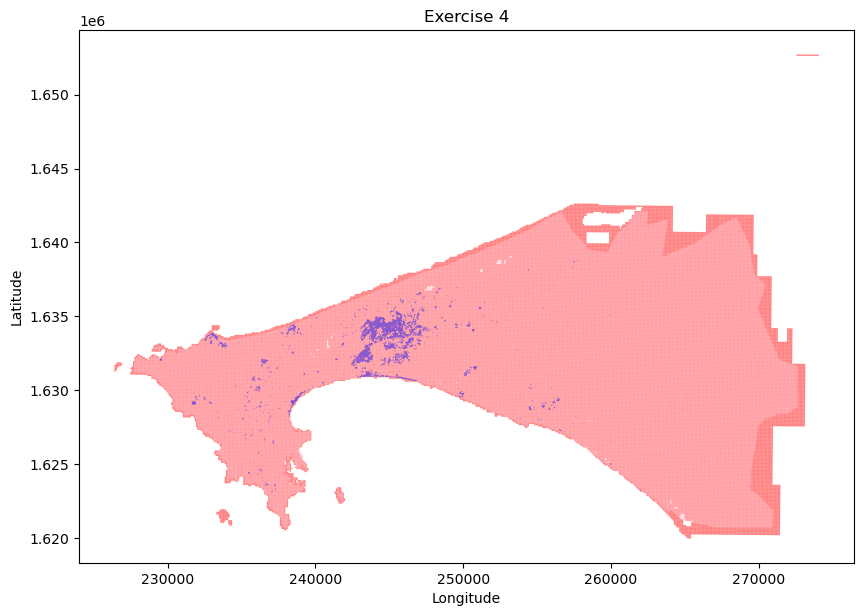

In [2]:
# Test plotting 
# Plotting all three datasets
fig, ax = plt.subplots(figsize=(10, 10))
df_population_grid.plot(ax=ax, color='red', alpha=0.5, label='Population Grid')
df_census.plot(ax=ax, color='pink', alpha=0.5, label='Census')
df_informal_settlements.plot(ax=ax, color='blue', alpha=0.5, label='Slums')

# Add title and labels
ax.set_title("Exercise 4")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()



### Step 2: Dissolve the Census Layer by Department

- **Dissolve Operation**: Use the `Department` column to dissolve the census layer. Aggregate the data by summing up the values in the `POPULATION` column to get the total population for each Department.

- **Reset the Index**: After the dissolve operation, reset the index so that the `Department` becomes a column again. This is important for maintaining the structure of your DataFrame for further analysis.



['RUFISQUE' 'PIKINE' 'GUEDIAWAYE' 'DAKAR']
   Department                                           geometry  POPULATION  \
0       DAKAR  MULTIPOLYGON (((234021.5 1625063.4, 234020.5 1...     1146067   
1  GUEDIAWAYE  POLYGON ((241919.5 1633901.197, 241919.5 16338...      330016   
2      PIKINE  POLYGON ((239891.5 1630497.275, 239890.5 16304...     1170620   
3    RUFISQUE  POLYGON ((253663.5 1627857.336, 253663.5 16278...      456980   

   polygon_area  
0  7.869147e+07  
1  1.781783e+07  
2  8.083093e+07  
3  2.999564e+08  


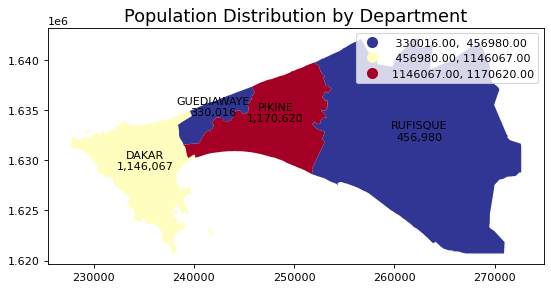

In [109]:
# Census layer 

# Aggregate the data:
print(df_census["Department"].unique())

# Dissolved by
dissolved = df_census.dissolve(by = "Department", aggfunc = "sum") # Use aggfunc to add ALL population of the same deprtment

# Area and reset index
dissolved["polygon_area"] = dissolved.geometry.area
dissolved = dissolved.reset_index()  # Define new GEOMETRY
print(dissolved)


# Plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
dissolved.plot(column = "POPULATION", scheme = "quantiles",k = 3, cmap = "RdYlBu_r", legend = True, ax = ax)  # k=3 means three groups 
plt.title("Population Distribution by Department", fontsize = 16)

# Label each department at its representative point
for idx, row in dissolved.iterrows():
    ax.text(row["geometry"].centroid.x, row["geometry"].centroid.y,   # Add text annoation to each item, define x and y location of the annotation
            f"{row['Department']}\n{row['POPULATION']:,}", 
            fontsize=10, ha="center", color="black"
           )

# Plot
plt.show()

### Step 3: Plot the Dissolved Census Layer

- Plot the dissolved census layer, using the `POPULATION` column. Ensure that your plot includes a legend to represent the population distribution across different departments effectively.

- Again optionally, you can compute and also visualize the population density instead.

Question: What is the population of each Department in Dakar Metropolitan area?

# Task 2: Population in Informal Settlements by Department

## Objective

The goal of this task is to determine the total population living in informal settlements within each Department in Dakar.

### Step 1: Intersect Informal Settlements with the Dissolved Census Layer

- **Intersection Operation**: Perform an intersection between the informal settlements layer and the dissolved census layer. This operation will help identify the parts of the census polygons that overlap with informal settlements.
-  **Visualize** the intersected layer using the 'Department Column'



<Axes: >

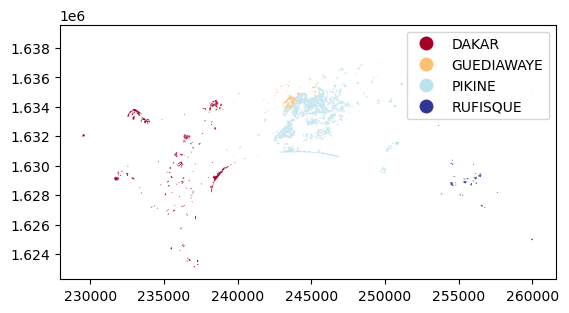

In [4]:
# Intersect slums with dissolved census layer 
itx = dissolved.overlay(df_informal_settlements, how = "intersection")  # Slums' District with Census (Number of people) 

# Plot according to Departments 
itx.plot(column = "Department", cmap = "RdYlBu", linewidth = 0, legend = True)

In [5]:
print(itx)
print(df_population_grid)

     Department  POPULATION  polygon_area    CAT  \
0         DAKAR     1146067  7.869147e+07      4   
1         DAKAR     1146067  7.869147e+07     43   
2         DAKAR     1146067  7.869147e+07     69   
3         DAKAR     1146067  7.869147e+07     73   
4         DAKAR     1146067  7.869147e+07    100   
...         ...         ...           ...    ...   
1508   RUFISQUE      456980  2.999564e+08  16536   
1509   RUFISQUE      456980  2.999564e+08  16584   
1510   RUFISQUE      456980  2.999564e+08  16641   
1511   RUFISQUE      456980  2.999564e+08  17389   
1512   RUFISQUE      456980  2.999564e+08  17476   

                                               geometry  
0     POLYGON ((235782.531 1630749.007, 235768.472 1...  
1     POLYGON ((235755.048 1627009.569, 235757.077 1...  
2     POLYGON ((235722.89 1630785.935, 235731.678 16...  
3     POLYGON ((235718.334 1627261.37, 235712.413 16...  
4     POLYGON ((235803.172 1630809.988, 235752.163 1...  
...                        

### Step 2: Spatial Join with the Population Grid

- **Spatial Join**: Perform a spatial join between the layer resulting from the intersection and the population grid layer. This join will allow you to attribute the population data from the grid to the corresponding areas of informal settlements.

- **Coordinate Reference System (CRS) Check**: Before performing the spatial join, ensure both layers are in the same CRS. If they are not, reproject one of the layers to match the CRS of the other. 



In [6]:
# Spatial join of intersection with population grid layer
spjn = gpd.sjoin(itx, df_population_grid, how = "inner", predicate = "intersects")


print(spjn.geometry.name)
print(spjn)

geometry
     Department  POPULATION  polygon_area    CAT  \
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
...         ...         ...           ...    ...   
1511   RUFISQUE      456980  2.999564e+08  17389   
1512   RUFISQUE      456980  2.999564e+08  17476   
1512   RUFISQUE      456980  2.999564e+08  17476   
1512   RUFISQUE      456980  2.999564e+08  17476   
1512   RUFISQUE      456980  2.999564e+08  17476   

                                               geometry  index_right  \
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        39873   
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        40319   
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        39874   
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        39419   
0     

Now plot your new layer after the spatial join using the 'VALUE' column and a legend. If it seems to be working, now you can see the distribution of the population of the informal settlements across Dakar!

<Axes: >

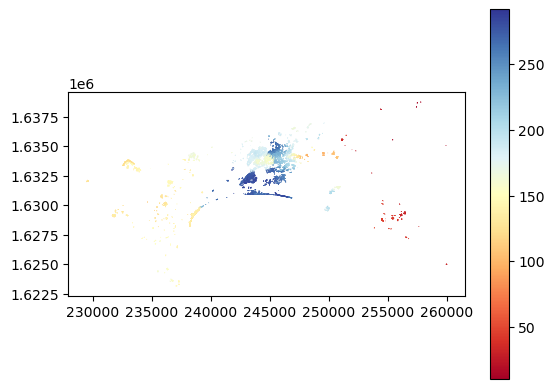

In [7]:
#spjn.plot()
spjn.plot(column = "VALUE", cmap = "RdYlBu", linewidth = 0, legend = True)

### Step 3: Aggregate Population Data by Department

- **Group and Summarize**: After the spatial join, group the resulting data by the `Department` column. Summarize the `VALUE` column, which represents the population in each grid cell, to calculate the total population living in informal settlements for each Department.

- **New DataFrame Creation**: Create a new DataFrame from this grouped data. This new DataFrame should contain columns for each Department and their corresponding population on informal settlements.



In [8]:
# Group by and sumamrise 
print(spjn)

# Group by Department and sum up by values 
grouped_spjn = spjn.groupby("Department")["VALUE"].sum()

# Display the grouped and summed result
print(grouped_spjn)

     Department  POPULATION  polygon_area    CAT  \
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
0         DAKAR     1146067  7.869147e+07      4   
...         ...         ...           ...    ...   
1511   RUFISQUE      456980  2.999564e+08  17389   
1512   RUFISQUE      456980  2.999564e+08  17476   
1512   RUFISQUE      456980  2.999564e+08  17476   
1512   RUFISQUE      456980  2.999564e+08  17476   
1512   RUFISQUE      456980  2.999564e+08  17476   

                                               geometry  index_right  \
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        39873   
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        40319   
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        39874   
0     POLYGON ((235782.531 1630749.007, 235768.472 1...        39419   
0     POLYGON (

### Step 4: Merge Informal Population Data with Dissolved Census Layer

- **Merge Data**: Use the `merge` function to combine the new DataFrame containing the total population in informal settlements per Department with the previously dissolved census layer. The merge should be based on the `Department` column, which is common to both datasets.

- **Ensure Consistency**: Before merging, ensure that the `Department` column names and data types are consistent across both DataFrames to avoid any merging issues.

This final step integrates the detailed population analysis back into the broader census context, providing a comprehensive view of the population distribution, both in general and within informal settlements, across the Dakar metropolitan area's departments.


In [19]:
print(grouped_spjn)
print(type(grouped_spjn))
print(dissolved)
print(type(dissolved))


Department
DAKAR         131307.043907
GUEDIAWAYE     88977.944412
PIKINE        999004.768799
RUFISQUE        5407.374538
Name: VALUE, dtype: float64
<class 'pandas.core.series.Series'>
   Department                                           geometry  POPULATION  \
0       DAKAR  MULTIPOLYGON (((234021.5 1625063.4, 234020.5 1...     1146067   
1  GUEDIAWAYE  POLYGON ((241919.5 1633901.197, 241919.5 16338...      330016   
2      PIKINE  POLYGON ((239891.5 1630497.275, 239890.5 16304...     1170620   
3    RUFISQUE  POLYGON ((253663.5 1627857.336, 253663.5 16278...      456980   

   polygon_area  
0  7.869147e+07  
1  1.781783e+07  
2  8.083093e+07  
3  2.999564e+08  
<class 'geopandas.geodataframe.GeoDataFrame'>


In [84]:
# Converting the grouped data frame back to a dataframe, otherwise it will NOT merge. 
grouped_spjn_df.astype({
  "Department": "string",    # Convert column by column
  "VALUE" : "float",
})
print(grouped_spjn_df)

# Merging two data frames 
merged_df = grouped_spjn_df.merge(dissolved, on = "Department", how = "inner")  # "on" means the common column name they have 

# Convert data frame to Geopandas dataframe:
merged_gdf = gpd.GeoDataFrame(merged_df, geometry = "geometry")

   Department          VALUE
0       DAKAR  131307.043907
1  GUEDIAWAYE   88977.944412
2      PIKINE  999004.768799
3    RUFISQUE    5407.374538


In [85]:
# % of people in slums in each department
# New column
merged_gdf["Percentage"] = (100 * (merged_gdf["VALUE"])/(merged_gdf["POPULATION"]))
for index, row in merged_gdf.iterrows():
    print(f"The percentage of population living in informal settlements in {row['Department']} is {row['Percentage']:.2f}%")

The percentage of population living in informal settlements in DAKAR is 11.46%
The percentage of population living in informal settlements in GUEDIAWAYE is 26.96%
The percentage of population living in informal settlements in PIKINE is 85.34%
The percentage of population living in informal settlements in RUFISQUE is 1.18%


In [107]:
# Classify 'Percentage' into 3 categories: Low, Medium, High
merged_gdf["CLASS"] = pd.cut(
    merged_gdf['Percentage'], 
    bins = [0, 50, 100],
    labels = ["Low", "High"],
    right = True 
)


print(merged_gdf)

   Department          VALUE  \
0       DAKAR  131307.043907   
1  GUEDIAWAYE   88977.944412   
2      PIKINE  999004.768799   
3    RUFISQUE    5407.374538   

                                            geometry  POPULATION  \
0  MULTIPOLYGON (((234021.5 1625063.4, 234020.5 1...     1146067   
1  POLYGON ((241919.5 1633901.197, 241919.5 16338...      330016   
2  POLYGON ((239891.5 1630497.275, 239890.5 16304...     1170620   
3  POLYGON ((253663.5 1627857.336, 253663.5 16278...      456980   

   polygon_area  Percentage CLASS  
0  7.869147e+07   11.457187   Low  
1  1.781783e+07   26.961706   Low  
2  8.083093e+07   85.339800  High  
3  2.999564e+08    1.183285   Low  


- What is the proportion of people living in informal settlements per Department in comparison to the total population?
- Classify the proportion in a new column into 2 or 3 classes (for instance low, medium, high), according to your preference.
- Optional: Plot a map with the new classes
-  Make sure your code is well commented

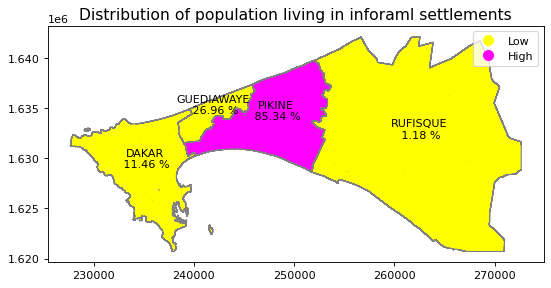

In [108]:
# Graph plotting 
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
merged_gdf.plot(column = "CLASS", cmap = "spring_r", legend = True, ax = ax, edgecolor = "gray")  # k=3 means three groups 
plt.title("Distribution of population living in inforaml settlements", fontsize = 14)

# Label each department at its representative point

for idx, row in merged_gdf.iterrows():
    ax.text(row["geometry"].centroid.x, row["geometry"].centroid.y,   # Add text annoation to each item, define x and y location of the annotation
             f"{row["Department"]}\n {row["Percentage"]:.2f} %",
            fontsize=10, ha="center", color="black"
           )

# Plot
plt.show()
